Simulation of one of the results from NNT's paper [What You See and What You Don't See: The Hidden Moments of a Probability Distribution](https://twitter.com/nntaleb/status/1246389636865445888?s=20).

Copied almost verbatim from [Mike Lawler](https://twitter.com/mikeandallie)'s excellent [blog post](https://mikesmathpage.wordpress.com/2020/04/05/sharing-a-neat-statistical-result-from-one-of-nassim-talebs-papers-with-kids/) explaining it to his children with Mathematica.

The idea is that we take the largest of $n$ samples from a distribution, $K_{max}$. We then see what fraction of new samples are greater than the previously observed maximum. The result follows an exponential distribution with mean $1/n$, as predicted in the paper.

Here we use the Pareto distribution but it in fact works for all the distributions I tried, with any value of $n$.

In [1]:
using Statistics, Plots, Distributions

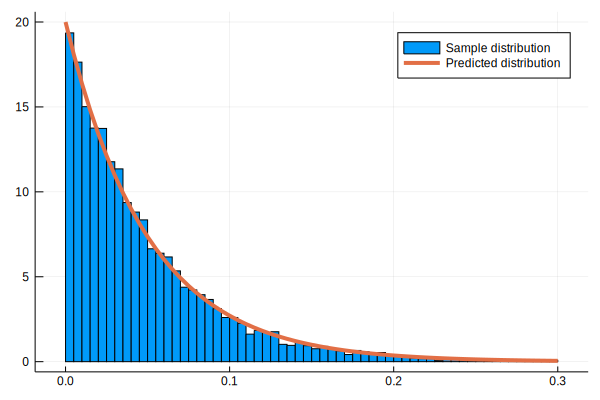

In [2]:
PDF = Pareto(1, 1.5) # Probability distribution to sample
n = 20 # Number of initial samples from which to obtain the maximum
experiments = 10000
trials = 1000

results = []
for j in 1:experiments
    Kmax = maximum(rand(PDF, n))
    push!(results, count((rand(PDF) > Kmax for i in 1:trials))/trials)
end

histogram(results, normed=true, nbins=0:0.005:0.3, label="Sample distribution")

prediction = Exponential(1/n) # Predicted exponential distribution with mean 1/n
plot!([(x, pdf(prediction, x)) for x in 0.0:0.005:0.3], lw=4, label="Predicted distribution")

In [3]:
1/mean(results)

21.04930800399937